---
categories: Technology \
title: YOLOv8 YOLO-NAS 소개 \
created: 2023-10-17 13:29 \
tags:
  - Vision
  - YOLO
---


## [[Yolo-NAS]]

### 1️⃣*NAS:Neural Archtecture Search*
1. *탐색공간(Search Space)* 검색 공간 또는 검색 공간으로 선택할 수 있는 유효한 아키텍처의 집합을 정의한다.
	- 탐색을 수행하는 공간
	- candidate operation (convolution, fully-connected, pooling, etc)
	- define count about operation
	- 각각이 하나의 유효한 네트워크와 이들에 의해 구성된 유효한 네트워크 구성의 재료 (valid network configuration)
2. *탐색전략(Search Strategy)* 검색 알고리즘으로 검색 공간에서 가능한 아키텍처를 전송하는 방법을 담당하는 검색 알고리즘
	-  search space에서 생성된 유효한 네트워크 구성 중 목표에 가장 합당한 구성을 찾는 알고리즘
	- random search, reinforcement learning, evolutionary strategy, gradient descent, bayesian optimization 등
	- exploration(탐색공간 커버)과 exploitation(효율적인 탐색) 모두를 수행해야 함.
	- exploration-exploitation trade-off
3. *성능평가전략(Performance Estimation Strategy)* 평가 전략으로, 후보 아키텍처를 비교하는 데 사용되는 가치 평가 전략
	-  후보 configuration에서 성능을 예측하고 평가, 더 좋은 configuration 추출할지 , 탐색을 지속할지 등을 결정 - 모든 경우를 시행하는 경우와 일부만으로 평가할 수 있는지 등 효율을 고려.
##### *NAS Examples*
1. NAS with Reinforcement Learning
2. AmoebaNet
3. Differentiable Architecture Search (DARTS)

### 2️⃣*YOLO-NAS 구성*
1) *Backbone* : Dense + Sparse, image feature extract part
2) *Neck*: Backbone에서 추출된 특징을 향상, 다양한 스켈일에서 예측 생성
4) *Head*: 다중 스케일 피라미드를 사용 백본의  다양한 레벨에서의 특징을 결합 예측생성 (분류 분기 + 회귀 분기

>[! 양자화 (Quantization)]
>모델 가중치의 정밀도를 낮춰 메모리 사용량을 줄이고 실행 속도를 높이는 과정
>- YOLO-NAS 양자화 기법은 int8  가중치 Float32 $\longrightarrow$ 1byte 메모리 절약 "EurVgg"사용해 정확도 손실을 줄임.
>- Uranus Hybrid Quantization : 특정 레이어에만 양자화 적용 정보 소실과 latency  균형

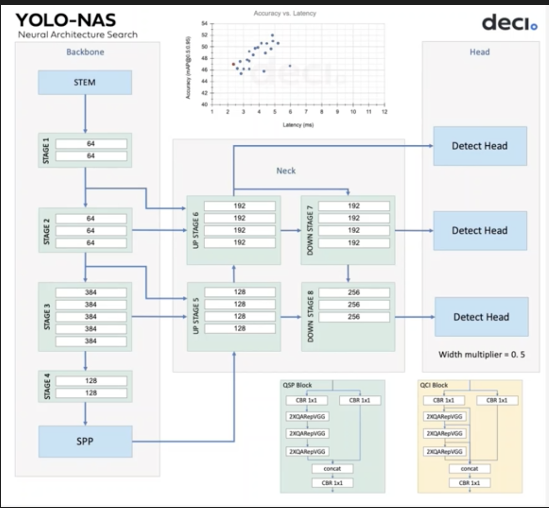![[YOLO-NAS.png|600]]
### 3️⃣*YOLO8과의 비교 평가*

>[!warning]
>- 정확한 비교라기 보다 몇몇의 의견
>- 🙂개인적 의견 : 제한 조건이 없는 상태에서 성능은 YOLOv8이 뛰어남 그러나 제한된 조건에서 사용하거나 커스터마이징 하는데에는 YOLO-NAS도 강점이 있음.
### [Ultralytics](https://github.com/ultralytics/ultralytics)
### [Ultralytics/yolo-nas](https://docs.ultralytics.com/models/yolo-nas/?h=nas#inference-and-validation-examples)
### [Deci-super-gradients](https://github.com/Deci-AI/super-gradients/blob/master/YOLONAS.md)
### [model-zoo](https://github.com/Deci-AI/super-gradients/blob/master/documentation/source/model_zoo.md)

|영역|YOLO-NAS|YOLOv8|
|-------|-------|-------|
|작은 물체 감지|뛰어남|제한적|
|로컬라이제이션 정확성|뛰어남|제한적|
|학습 후 정량화|뛰어남|제한적|
|학습 후 정량화|용이함|어려움|
|online edge device app|가능함|가능함|
|정확도|높음|높음|
|처리속도|빠름|빠름|
|효율성|높음|높음|


### 3️⃣*YOLO-NAS의 사전 학습 데이터*
#### *pretrian dataset*
[Object365 bench mark dataset](https://www.objects365.org/overview.html)
#### *test dataset*
Roboflow A100 데이터셋에서 검출능력 확인

### 4️⃣*YOLO  Local Test 환경 설정*

> [!NOTE] 객체 추적과 관련한 개념
> - SORT(Simple Online and Realtime Tracking) - real time object tracking 알고리즘을 사용하여 객체 추적이 이뤄짐
> - 객체식별은 YOLO, 객체추적은 SORT로 이뤄짐
> -  SORT 는 이전 Frame에서 인식된 객체(Object)와 다음 Frame 에서 인식된 객체가 같은 객체인지 평가하여 확인 (kallman filter 등 사용)

- 운영체제는 Window 입니다.
- IDE는 사용하시는 것으로 저는 VSCODE 를 사용합니다.
- 😀저의 경우 ==python3.8==  사용하였습니다. (😅 최신 python은 3.12 입니다. 기존 사용하던 환경 세팅이 귀찮아서 아직 Upgrade 하지 않고 있습니다.)
- 특정 디렉토리에 실습용 폴더📂를 만드세요. 저장 공간이 충분해야 합니다.
- win-key + R 명령을 누르면  실행 입력창이 만들어 집니다. " cmd " 입력하면  cli 명령어를 입력할 수 있어요.
- "  CD [경로 또는 디렉토리명]" 을 입력하여 실습용 폴더로 이동하세요.

- Local 환경 cmd 명령 : python 은 설치되어 있는 것으로 봄
```bash or cmd
	python --version
	pip install virtualenv
	virtualenv env

	cd env/Scripts
	activate
	cd ..
	mkdir source
	cd source
```
- 보통은 requirement.txt 파일을 통해서 한번에 필요 package를 설치하지만 이번에는 하나씩 설치해 봅니다.
```bash or cmd
	# python 라이브러리 관리 프로그램 pip를 업그레이드 합니다.
	python.exe -m pip install --upgrade pip
	# 딥러닝에 많이 사용되는 torch 플랫폼(여기서는 cpu 버전을 설치합니다. GPU 가 있는 경우 cuda 사용 torcy를 설치하세요.)
	pip install torch torchvision torchaudio     
	# openCV2 이미지와 화상을 처리하는 라이브러리를 설치합니다.
	pip install opencv-python==4.6.0.66
	pip install opencv-contrib-python==4.6.0.66
	# YOLOv8 라이브러리를 설치합니다.
	pip install ultralytics
	# SORT 알고리즘인 deep-sort 알고리즘을 설치합니다.
	pip install deep-sort-realtime
	# YOLO-NAS 라이브러리를 설치합니다.
	pip install super-gradients
```

- Fine tunning 및 커스텀 traing에 참고되는 Reference 예제 너TUBE \
https://youtu.be/PBh9MFH2lB4?si=F0xY48Dp_xnDR2IP \
https://youtu.be/st9o5XqqNno?si=vqZRaG2QpA5FmEUV


# 깃헙 주소 https://github.com/hugwolf77/SVU_industry_AI


## 여기서 부터는 Colab 환경에서 진행

- Local 환경과 다르게 Colab 환경에는 cuda용 torch 환경이 이미 세팅되어 있습니다.

In [ ]:
# GPU 확인
!nvidia-smi

Thu Oct 19 12:37:27 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# torch 환경확인
import torch
print(torch.__version__)
if torch.cuda.is_available:
  print('GPU available')
else:
  print('Please set GPU via Edit -> Notebook Settings.')

2.0.1+cu118
GPU available


In [ ]:
!pip install opencv-python==4.6.0.66                                                          # openCV 라이브러리
!pip install opencv-contrib-python==4.6.0.66
!pip install imutils                                                                          # opencv 관련 image 처리 라이브러리
!pip install super-gradients==3.2.0                                                           # YOLO-NAS 라이브러리
# !pip install --no-cache-dir --extra-index-url https://pypi.nvidia.com pytorch-quantization    # pytorch 양자화 라이브러리
# !pip install pytorch-quantization==2.1.2 --extra-index-url https://pypi.ngc.nvidia.com &> /dev/null
# !pip install ultralytics                                                                    # YOLOv8 라이브러리 : 이번에는 사용하지 않음.
!pip install deep-sort-realtime                                                               # tracking 을 위한 Deep-SORT 알고리즘
# !pip install roboflow                                                                         # roboflow 데이터
!pip install pytube --upgrade                                                                 # 너튜브와 연동하는 python 라이브러리
!pip install torchinfo                                                                        # model 이 가진 신경망 레이어 요약 정보 출력
!pip install -U "git+https://github.com/ytdl-org/youtube-dl.git"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 11.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.8.0.76
    Uninstalling opencv-python-4.8.0.76:
      Successfully uninstalled opencv-python-4.8.0.76
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 MB 10.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.8.0.76
    Uninstalling opencv-contrib-python-4.8.0.76:
      Successfully uninstalled opencv-contrib-python-4.8.0.76
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.5/684.5 kB 49.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 102.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 48.3 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.7 MB/s eta 0:00:00
  Cloning https://github.com/ytdl-org/youtube-dl.git to /tmp/pip-req-build-k_np5mhp
  Running command git clone --filter=blob:none --quiet https://github.com/ytdl-org/youtube-dl.git /tmp/pip-req-build-k_np5mhp
  Resolved https://github.com/ytdl-org/youtube-dl.git to commit 00ef748cc0e35ee60efd0f7a00e373ab8d1af86b
  Preparing metadata (setup.py) ... done
  Created wheel for youtube-dl: filename=youtube_dl-2021.12.17-py2.py3-none-any.whl size=1940306 sha256=c8ab29ef9075959ca471bc5bd888518546b0553cd0339ee88601050d5e56fff4
  Stored in directory: /tmp/pip-ephem-wheel-cache-mlirdz4i/wheels/64/8e/40/866e846163e3e4859bbe820ff8847ec97f4320864f1525aa9a
Successfully built youtube-dl


## 너튜브 동영상 가져오기
> - 아쉽게도 Colab 환경에서는 webcam을 직접 사용할 수 없습니다.
> - 그래서 너튜브의 영상을 사용하기로 했습니다.
> - 아래 작업은 너튜브의 영상을 확인하고 가져오는 작업입니다.


- 사용된 동영상은 본 수업만을 위해서 youtube 영상을 잠시 가져왔습니다. 상업적이거나 교재에 사용하시면 저작권 문제가 있을 수 있습니다.

- 사용할 너튜브 영상을 확인해 봅니다.
- 전 도쿄에 신쥬쿠 실시간 영상을 가져와 봤습니다.
- 주의하실 점은 동영상 다운로드를 작게 (15초 이하) 하셔야 합니다. colab 환경의 메모리 한계상 더 큰 크기를 진행하시면 모델이 예측 진행하는 중 메모리 다운이 될 수 있습니다.
- 예측 완료된 데이터를 이미지로 저장하면서 메모리가 부족합니다. ㅎㅎㅎ;;;

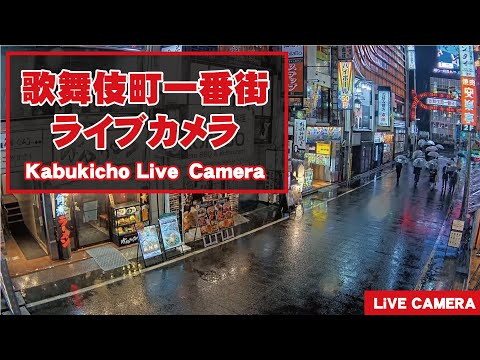

In [ ]:
# Import the YouTubeVideo class from IPython.display
from IPython.display import YouTubeVideo
video_id = 'DjdUEyjx8GM'  # 너튜브의 동영상 id 지정    {노원 우이천 돌다리 : fVKew_ulxnc, 동경 신주쿠: gFRtAAmiFbE, 동경 신주쿠 가부키쵸: DjdUEyjx8GM } 'cH7VBI4QQzA'
# Create a YouTubeVideo object with the specified video ID
video = YouTubeVideo(video_id)
# Display the video
display(video)

In [ ]:
# Define the URL of the YouTube video
video_url = f'https://www.youtube.com/watch?v={video_id}'
# Download the video in mp4 format
!python -m youtube_dl -f 'bestvideo[ext=mp4]+bestaudio[ext=m4a]/mp4' "$video_url"

[youtube] DjdUEyjx8GM: Downloading webpage
[youtube] DjdUEyjx8GM: Downloading m3u8 information
[youtube] DjdUEyjx8GM: Downloading MPD manifest
[download] Destination: 【 LIVE 】東京都 新宿 歌舞伎町 24時間 ライブ _ Tokyo Shinjuku Kabukicho Live 2023-10-19 13_19-DjdUEyjx8GM.mp4
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --ena

In [ ]:
# 다운로드 한 동영상의 위치를 지정합니다.
input_video_path = f"/content/【 LIVE 】東京都 新宿 歌舞伎町 24時間 ライブ _ Tokyo Shinjuku Kabukicho Live 2023-10-19 12_41-DjdUEyjx8GM.mp4"
# 객체 감지후 저장될 파일의 이름을 지정합니다.
output_video_path = "detections.mp4"

In [ ]:
import torch
from super_gradients.training import models
from torchinfo import summary

yolo_nas_l = models.get("yolo_nas_l", pretrained_weights="coco")

summary(model=yolo_nas_l,
        input_size=(16, 3, 640, 640),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

The console stream is logged into /root/sg_logs/console.log


[2023-10-19 12:42:02] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2023-10-19 12:42:04] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-10-19 12:42:11] INFO - utils.py - NumExpr defaulting to 2 threads.
/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
[2023-10-19 12:42:12] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-10-19 12:42:12] WARNING - export.py - Failed to import pytorch_quantization
[2023-10-19 12:42:12] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2023-10-19 12:42:13] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md


Layer (type (var_name))                                           Input Shape          Output Shape         Param #              Trainable
YoloNAS_L (YoloNAS_L)                                             [16, 3, 640, 640]    [16, 8400, 4]        --                   True
├─NStageBackbone (backbone)                                       [16, 3, 640, 640]    [16, 96, 160, 160]   --                   True
│    └─YoloNASStem (stem)                                         [16, 3, 640, 640]    [16, 48, 320, 320]   --                   True
│    │    └─QARepVGGBlock (conv)                                  [16, 3, 640, 640]    [16, 48, 320, 320]   3,024                True
│    └─YoloNASStage (stage1)                                      [16, 48, 320, 320]   [16, 96, 160, 160]   --                   True
│    │    └─QARepVGGBlock (downsample)                            [16, 48, 320, 320]   [16, 96, 160, 160]   88,128               True
│    │    └─YoloNASCSPLayer (blocks)                     

In [ ]:
device = 'cuda' if torch.cuda.is_available() else "cpu"
yolo_nas_l.to(device).predict(input_video_path).save(output_video_path)

Predicting Video: 100%|██████████| 450/450 [00:11<00:00, 38.82it/s]


In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/detections.mp4'
compressed_path = "/content/result_compressed_pred_1.mp4"
os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=1000 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!git clone https://github.com/hugwolf77/SVU_industry_AI.git
%cd SVU_industry_AI/yolo_env/source

fatal: destination path 'SVU_industry_AI' already exists and is not an empty directory.
/content/SVU_industry_AI/yolo_env/source


In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os
# Input video path
save_path = '/content/output_base.mp4'
compressed_path = "/content/result_compressed_pred_2.mp4"
os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=1000 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

- 객체추적

In [ ]:
# 라이브러리 import
import datetime
import torch
import cv2
import torch.backends.cudnn as cudnn
import numpy as np

from super_gradients.training import models
from super_gradients.common.object_names import Models
from deep_sort_realtime.deepsort_tracker import DeepSort


# GPU 설정
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
# 모델 설정
model = models.get("yolo_nas_l", pretrained_weights="coco").to(device)

# tracker 설정 : max_age는 최대 몇 프레임까지 인정할지
tracker = DeepSort(max_age=50)

# video 설정
video_path = input_video_path
cap = cv2.VideoCapture(video_path)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# 코덱 및 비디오 쓰기 설정
output_path = "/content/output.mp4"
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
writer = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

# coco classname 정보 => Yaml 로 교체
coco128 = open('./yolov8_pretrained/coco128.txt', 'r')
classNames = coco128.read()
class_list = classNames.split('\n')
coco128.close()

# 파마메터 지정
class_id = 0
iou=0.3
conf= 0.4

# Create a list of random colors to represent each class
np.random.seed(42)  # to get the same colors
colors = np.random.randint(0, 255, size=(len(class_list), 3))  # (80, 3)

while True:
    # Start time to compute the FPS
    start = datetime.datetime.now()
    ret, frame = cap.read()  # 비디오 프레임 읽기
    if not ret:
        print('Cam Error')
        break
    detect = next(iter(model.predict(frame, iou=iou, conf=conf)))
    # Extract the bounding box coordinates, confidence scores, and class labels from the detection results
    bboxes_xyxy = torch.from_numpy(detect.prediction.bboxes_xyxy).tolist()
    confidence = torch.from_numpy(detect.prediction.confidence).tolist()
    labels = torch.from_numpy(detect.prediction.labels).tolist()
    # Combine the bounding box coordinates and confidence scores into a single list
    concate = [sublist + [element] for sublist, element in zip(bboxes_xyxy, confidence)]
    # Combine the concatenated list with the class labels into a final prediction list
    final_prediction = [sublist + [element] for sublist, element in zip(concate, labels)]
    # 결과 저장할 리스트 초기화
    results = []
    # Loop over the detections
    for data in final_prediction:
        # Extract the confidence (i.e., probability) associated with the detection
        confidence = data[4]
        # Filter out weak detections by ensuring the confidence is greater than the minimum confidence and with the class_id
        if class_id == None:
            if float(confidence) < conf:
                continue
        else:
            if ((int(data[5] != class_id)) or (float(confidence) < conf)):
                continue
        # If the confidence is greater than the minimum confidence, draw the bounding box on the frame
        xmin, ymin, xmax, ymax = int(data[0]), int(data[1]), int(data[2]), int(data[3])
        class_id = int(data[5])
        # Add the bounding box (x, y, w, h), confidence, and class ID to the results list
        results.append([[xmin, ymin, xmax - xmin, ymax - ymin], confidence, class_id])

    # Update the tracker with the new detections
    tracks = tracker.update_tracks(results, frame=frame)
    # Loop over the tracks
    for track in tracks:
        # If the track is not confirmed, ignore it
        if not track.is_confirmed():
            continue
        # Get the track ID and the bounding box
        track_id = track.track_id
        ltrb = track.to_ltrb()
        class_id = track.get_det_class()
        x1, y1, x2, y2 = int(ltrb[0]), int(ltrb[1]), int(ltrb[2]), int(ltrb[3])
        # Get the color for the class
        color = colors[class_id]
        B, G, R = int(color[0]), int(color[1]), int(color[2])
        # Create text for track ID and class name
        text = str(track_id) + " - " + str(class_list[class_id])
        # Draw bounding box and text on the frame
        cv2.rectangle(frame, (x1, y1), (x2, y2), (B, G, R), 2)
        cv2.rectangle(frame, (x1 - 1, y1 - 20), (x1 + len(text) * 12, y1), (B, G, R), -1)
        cv2.putText(frame, text, (x1 + 5, y1 - 8), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    # End time to compute the FPS
    end = datetime.datetime.now()
    # Show the time it took to process 1 frame
    print(f"Time to process 1 frame: {(end - start).total_seconds() * 1000:.0f} milliseconds")
    # Calculate the frames per second and draw it on the frame
    fps = f"FPS: {1 / (end - start).total_seconds():.2f}"
    cv2.putText(frame, fps, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 8)

    # Show the frame
    # cv2.imshow("Frame", frame)

    # Write the frame to the output video file
    writer.write(frame)
    # Check for 'q' key press to exit the loop
    if cv2.waitKey(1) == ord("q"):
        break

# Release video capture and video writer objects
cap.release()
writer.release()

# Close all windows
cv2.destroyAllWindows()


[2023-10-19 13:29:33] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2023-10-19 13:29:33] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_l
[2023-10-19 13:29:33] INFO - embedder_pytorch.py - MobileNetV2 Embedder for Deep Sort initialised
[2023-10-19 13:29:33] INFO - embedder_pytorch.py - - gpu enabled: True
[2023-10-19 13:29:33] INFO - embedder_pytorch.py - - half precision: True
[2023-10-19 13:29:33] INFO - embedder_pytorch.py - - max batch size: 16
[2023-10-19 13:29:33] INFO - embedder_pytorch.py - - expects BGR: True
[2023-10-19 13:29:33] INFO - deepsort_tracker.py - DeepSort Tracker initialised
[2023-10-19 13:29:33] INFO - deepsort_tracker.py - - max age: 50
[2023-10-19 13:29:33]

Time to process 1 frame: 743 milliseconds


[2023-10-19 13:29:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 420 milliseconds


[2023-10-19 13:29:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 331 milliseconds


[2023-10-19 13:29:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 341 milliseconds


[2023-10-19 13:29:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 348 milliseconds


[2023-10-19 13:29:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 428 milliseconds


[2023-10-19 13:29:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 345 milliseconds


[2023-10-19 13:29:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 346 milliseconds


[2023-10-19 13:29:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 380 milliseconds


[2023-10-19 13:29:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 363 milliseconds


[2023-10-19 13:29:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 352 milliseconds


[2023-10-19 13:29:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 655 milliseconds


[2023-10-19 13:29:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 356 milliseconds


[2023-10-19 13:29:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 462 milliseconds


[2023-10-19 13:29:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 525 milliseconds


[2023-10-19 13:29:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 524 milliseconds


[2023-10-19 13:29:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 518 milliseconds


[2023-10-19 13:29:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 586 milliseconds


[2023-10-19 13:29:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 539 milliseconds


[2023-10-19 13:29:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 556 milliseconds


[2023-10-19 13:29:44] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 531 milliseconds


[2023-10-19 13:29:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 677 milliseconds


[2023-10-19 13:29:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 556 milliseconds


[2023-10-19 13:29:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 419 milliseconds


[2023-10-19 13:29:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 662 milliseconds


[2023-10-19 13:29:47] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 342 milliseconds


[2023-10-19 13:29:47] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 346 milliseconds


[2023-10-19 13:29:47] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 346 milliseconds


[2023-10-19 13:29:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 361 milliseconds


[2023-10-19 13:29:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 362 milliseconds


[2023-10-19 13:29:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 377 milliseconds


[2023-10-19 13:29:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 363 milliseconds


[2023-10-19 13:29:50] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 382 milliseconds


[2023-10-19 13:29:50] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 382 milliseconds


[2023-10-19 13:29:50] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 378 milliseconds


[2023-10-19 13:29:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 378 milliseconds


[2023-10-19 13:29:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 395 milliseconds


[2023-10-19 13:29:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 367 milliseconds


[2023-10-19 13:29:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 679 milliseconds


[2023-10-19 13:29:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 378 milliseconds


[2023-10-19 13:29:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 403 milliseconds


[2023-10-19 13:29:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 383 milliseconds


[2023-10-19 13:29:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 375 milliseconds


[2023-10-19 13:29:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 364 milliseconds


[2023-10-19 13:29:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 386 milliseconds


[2023-10-19 13:29:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 367 milliseconds


[2023-10-19 13:29:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 500 milliseconds


[2023-10-19 13:29:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 521 milliseconds


[2023-10-19 13:29:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 508 milliseconds


[2023-10-19 13:29:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 489 milliseconds


[2023-10-19 13:29:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 899 milliseconds


[2023-10-19 13:29:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 555 milliseconds


[2023-10-19 13:30:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 574 milliseconds


[2023-10-19 13:30:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 596 milliseconds


[2023-10-19 13:30:01] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 575 milliseconds


[2023-10-19 13:30:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 561 milliseconds


[2023-10-19 13:30:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 387 milliseconds


[2023-10-19 13:30:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 362 milliseconds


[2023-10-19 13:30:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 362 milliseconds


[2023-10-19 13:30:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 389 milliseconds


[2023-10-19 13:30:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 482 milliseconds


[2023-10-19 13:30:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 376 milliseconds


[2023-10-19 13:30:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 423 milliseconds


[2023-10-19 13:30:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 712 milliseconds


[2023-10-19 13:30:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 389 milliseconds


[2023-10-19 13:30:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 396 milliseconds


[2023-10-19 13:30:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 392 milliseconds


[2023-10-19 13:30:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 410 milliseconds


[2023-10-19 13:30:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 697 milliseconds
Time to process 1 frame: 383 milliseconds


[2023-10-19 13:30:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-10-19 13:30:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 759 milliseconds


[2023-10-19 13:30:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 781 milliseconds


[2023-10-19 13:30:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 373 milliseconds


[2023-10-19 13:30:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 390 milliseconds


[2023-10-19 13:30:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 405 milliseconds


[2023-10-19 13:30:12] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 918 milliseconds


[2023-10-19 13:30:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 587 milliseconds


[2023-10-19 13:30:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 559 milliseconds


[2023-10-19 13:30:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 588 milliseconds


[2023-10-19 13:30:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 563 milliseconds


[2023-10-19 13:30:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 578 milliseconds


[2023-10-19 13:30:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 608 milliseconds


[2023-10-19 13:30:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 549 milliseconds


[2023-10-19 13:30:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 555 milliseconds


[2023-10-19 13:30:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 457 milliseconds


[2023-10-19 13:30:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 402 milliseconds


[2023-10-19 13:30:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 407 milliseconds


[2023-10-19 13:30:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 384 milliseconds


[2023-10-19 13:30:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 695 milliseconds


[2023-10-19 13:30:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 460 milliseconds


[2023-10-19 13:30:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 416 milliseconds


[2023-10-19 13:30:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 371 milliseconds


[2023-10-19 13:30:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 402 milliseconds


[2023-10-19 13:30:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 406 milliseconds


[2023-10-19 13:30:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 400 milliseconds


[2023-10-19 13:30:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 401 milliseconds


[2023-10-19 13:30:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 424 milliseconds


[2023-10-19 13:30:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 400 milliseconds


[2023-10-19 13:30:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 396 milliseconds


[2023-10-19 13:30:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 413 milliseconds


[2023-10-19 13:30:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 406 milliseconds


[2023-10-19 13:30:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 768 milliseconds


[2023-10-19 13:30:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 369 milliseconds


[2023-10-19 13:30:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 400 milliseconds


[2023-10-19 13:30:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 421 milliseconds


[2023-10-19 13:30:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 567 milliseconds


[2023-10-19 13:30:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 644 milliseconds


[2023-10-19 13:30:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 554 milliseconds


[2023-10-19 13:30:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 499 milliseconds


[2023-10-19 13:30:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 558 milliseconds


[2023-10-19 13:30:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 566 milliseconds


[2023-10-19 13:30:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 682 milliseconds


[2023-10-19 13:30:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 562 milliseconds


[2023-10-19 13:30:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 579 milliseconds


[2023-10-19 13:30:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 785 milliseconds


[2023-10-19 13:30:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 397 milliseconds


[2023-10-19 13:30:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 387 milliseconds


[2023-10-19 13:30:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 362 milliseconds


[2023-10-19 13:30:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 391 milliseconds


[2023-10-19 13:30:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 360 milliseconds


[2023-10-19 13:30:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 366 milliseconds


[2023-10-19 13:30:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 373 milliseconds


[2023-10-19 13:30:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 394 milliseconds


[2023-10-19 13:30:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 383 milliseconds


[2023-10-19 13:30:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 400 milliseconds


[2023-10-19 13:30:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 373 milliseconds


[2023-10-19 13:30:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 415 milliseconds


[2023-10-19 13:30:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 702 milliseconds


[2023-10-19 13:30:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 371 milliseconds


[2023-10-19 13:30:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 422 milliseconds


[2023-10-19 13:30:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 369 milliseconds


[2023-10-19 13:30:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 400 milliseconds


[2023-10-19 13:30:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 361 milliseconds


[2023-10-19 13:30:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 381 milliseconds


[2023-10-19 13:30:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 358 milliseconds


[2023-10-19 13:30:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 418 milliseconds


[2023-10-19 13:30:44] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 375 milliseconds


[2023-10-19 13:30:44] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 539 milliseconds


[2023-10-19 13:30:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 477 milliseconds


[2023-10-19 13:30:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 503 milliseconds


[2023-10-19 13:30:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 943 milliseconds


[2023-10-19 13:30:47] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 577 milliseconds


[2023-10-19 13:30:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 576 milliseconds


[2023-10-19 13:30:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 602 milliseconds


[2023-10-19 13:30:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 557 milliseconds


[2023-10-19 13:30:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 531 milliseconds


[2023-10-19 13:30:50] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 527 milliseconds


[2023-10-19 13:30:50] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 411 milliseconds


[2023-10-19 13:30:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 372 milliseconds


[2023-10-19 13:30:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 405 milliseconds


[2023-10-19 13:30:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 379 milliseconds


[2023-10-19 13:30:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 370 milliseconds


[2023-10-19 13:30:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 381 milliseconds


[2023-10-19 13:30:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 712 milliseconds


[2023-10-19 13:30:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 402 milliseconds


[2023-10-19 13:30:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 380 milliseconds


[2023-10-19 13:30:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 359 milliseconds


[2023-10-19 13:30:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 373 milliseconds


[2023-10-19 13:30:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 359 milliseconds


[2023-10-19 13:30:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 383 milliseconds


[2023-10-19 13:30:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 379 milliseconds


[2023-10-19 13:30:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 389 milliseconds


[2023-10-19 13:30:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 379 milliseconds


[2023-10-19 13:30:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 364 milliseconds


[2023-10-19 13:30:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 395 milliseconds


[2023-10-19 13:30:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 648 milliseconds


[2023-10-19 13:30:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 350 milliseconds


[2023-10-19 13:30:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 362 milliseconds


[2023-10-19 13:31:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 364 milliseconds


[2023-10-19 13:31:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 533 milliseconds


[2023-10-19 13:31:01] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 539 milliseconds


[2023-10-19 13:31:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 571 milliseconds


[2023-10-19 13:31:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 536 milliseconds


[2023-10-19 13:31:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 508 milliseconds


[2023-10-19 13:31:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 600 milliseconds


[2023-10-19 13:31:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 563 milliseconds


[2023-10-19 13:31:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 542 milliseconds


[2023-10-19 13:31:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 948 milliseconds


[2023-10-19 13:31:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 385 milliseconds


[2023-10-19 13:31:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 379 milliseconds


[2023-10-19 13:31:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 373 milliseconds


[2023-10-19 13:31:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 404 milliseconds


[2023-10-19 13:31:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 358 milliseconds


[2023-10-19 13:31:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 417 milliseconds


[2023-10-19 13:31:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 373 milliseconds


[2023-10-19 13:31:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 358 milliseconds


[2023-10-19 13:31:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 384 milliseconds


[2023-10-19 13:31:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 373 milliseconds


[2023-10-19 13:31:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 381 milliseconds


[2023-10-19 13:31:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 400 milliseconds


[2023-10-19 13:31:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 367 milliseconds


[2023-10-19 13:31:12] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 747 milliseconds


[2023-10-19 13:31:12] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 461 milliseconds


[2023-10-19 13:31:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 475 milliseconds


[2023-10-19 13:31:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 383 milliseconds


[2023-10-19 13:31:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 402 milliseconds


[2023-10-19 13:31:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 417 milliseconds


[2023-10-19 13:31:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 384 milliseconds


[2023-10-19 13:31:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 403 milliseconds


[2023-10-19 13:31:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 372 milliseconds


[2023-10-19 13:31:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 451 milliseconds


[2023-10-19 13:31:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 551 milliseconds


[2023-10-19 13:31:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 558 milliseconds


[2023-10-19 13:31:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 946 milliseconds


[2023-10-19 13:31:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 587 milliseconds


[2023-10-19 13:31:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 589 milliseconds


[2023-10-19 13:31:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 587 milliseconds


[2023-10-19 13:31:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 562 milliseconds


[2023-10-19 13:31:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 550 milliseconds


[2023-10-19 13:31:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 412 milliseconds


[2023-10-19 13:31:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 351 milliseconds


[2023-10-19 13:31:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 386 milliseconds


[2023-10-19 13:31:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 353 milliseconds


[2023-10-19 13:31:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 350 milliseconds


[2023-10-19 13:31:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 379 milliseconds


[2023-10-19 13:31:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 417 milliseconds


[2023-10-19 13:31:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 693 milliseconds


[2023-10-19 13:31:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 366 milliseconds


[2023-10-19 13:31:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 422 milliseconds


[2023-10-19 13:31:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 402 milliseconds


[2023-10-19 13:31:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 411 milliseconds


[2023-10-19 13:31:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 397 milliseconds


[2023-10-19 13:31:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 370 milliseconds


[2023-10-19 13:31:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 396 milliseconds


[2023-10-19 13:31:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 369 milliseconds


[2023-10-19 13:31:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 377 milliseconds


[2023-10-19 13:31:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 387 milliseconds


[2023-10-19 13:31:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 366 milliseconds


[2023-10-19 13:31:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 682 milliseconds


[2023-10-19 13:31:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 384 milliseconds


[2023-10-19 13:31:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 386 milliseconds


[2023-10-19 13:31:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 428 milliseconds


[2023-10-19 13:31:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 603 milliseconds


[2023-10-19 13:31:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 527 milliseconds


[2023-10-19 13:31:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 530 milliseconds


[2023-10-19 13:31:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 584 milliseconds


[2023-10-19 13:31:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 517 milliseconds


[2023-10-19 13:31:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 543 milliseconds


[2023-10-19 13:31:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 565 milliseconds


[2023-10-19 13:31:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 567 milliseconds


[2023-10-19 13:31:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 585 milliseconds


[2023-10-19 13:31:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 691 milliseconds


[2023-10-19 13:31:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 405 milliseconds


[2023-10-19 13:31:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 394 milliseconds


[2023-10-19 13:31:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 381 milliseconds


[2023-10-19 13:31:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 418 milliseconds


[2023-10-19 13:31:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 384 milliseconds


[2023-10-19 13:31:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 405 milliseconds


[2023-10-19 13:31:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 364 milliseconds


[2023-10-19 13:31:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 359 milliseconds


[2023-10-19 13:31:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 394 milliseconds


[2023-10-19 13:31:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 370 milliseconds


[2023-10-19 13:31:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 371 milliseconds


[2023-10-19 13:31:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 428 milliseconds


[2023-10-19 13:31:44] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 662 milliseconds


[2023-10-19 13:31:44] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 377 milliseconds


[2023-10-19 13:31:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 422 milliseconds


[2023-10-19 13:31:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 402 milliseconds


[2023-10-19 13:31:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 403 milliseconds


[2023-10-19 13:31:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 403 milliseconds


[2023-10-19 13:31:47] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 379 milliseconds


[2023-10-19 13:31:47] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 420 milliseconds


[2023-10-19 13:31:47] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 408 milliseconds


[2023-10-19 13:31:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 608 milliseconds


[2023-10-19 13:31:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 586 milliseconds


[2023-10-19 13:31:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 553 milliseconds


[2023-10-19 13:31:50] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 967 milliseconds


[2023-10-19 13:31:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 654 milliseconds


[2023-10-19 13:31:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 577 milliseconds


[2023-10-19 13:31:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 592 milliseconds


[2023-10-19 13:31:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 646 milliseconds


[2023-10-19 13:31:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 489 milliseconds


[2023-10-19 13:31:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 387 milliseconds


[2023-10-19 13:31:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 386 milliseconds


[2023-10-19 13:31:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 359 milliseconds


[2023-10-19 13:31:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 397 milliseconds


[2023-10-19 13:31:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 397 milliseconds


[2023-10-19 13:31:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 394 milliseconds


[2023-10-19 13:31:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 402 milliseconds


[2023-10-19 13:31:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 685 milliseconds


[2023-10-19 13:31:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 383 milliseconds


[2023-10-19 13:31:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 389 milliseconds


[2023-10-19 13:31:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 402 milliseconds


[2023-10-19 13:31:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 383 milliseconds


[2023-10-19 13:31:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 365 milliseconds


[2023-10-19 13:32:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 417 milliseconds


[2023-10-19 13:32:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 440 milliseconds


[2023-10-19 13:32:01] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 364 milliseconds


[2023-10-19 13:32:01] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 391 milliseconds


[2023-10-19 13:32:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 354 milliseconds


[2023-10-19 13:32:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 403 milliseconds


[2023-10-19 13:32:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 701 milliseconds


[2023-10-19 13:32:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 390 milliseconds


[2023-10-19 13:32:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 527 milliseconds


[2023-10-19 13:32:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 570 milliseconds


[2023-10-19 13:32:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 537 milliseconds


[2023-10-19 13:32:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 558 milliseconds


[2023-10-19 13:32:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 578 milliseconds


[2023-10-19 13:32:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 543 milliseconds


[2023-10-19 13:32:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 641 milliseconds


[2023-10-19 13:32:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 563 milliseconds


[2023-10-19 13:32:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 571 milliseconds


[2023-10-19 13:32:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 606 milliseconds


[2023-10-19 13:32:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 372 milliseconds


[2023-10-19 13:32:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 702 milliseconds


[2023-10-19 13:32:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 392 milliseconds


[2023-10-19 13:32:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 364 milliseconds


[2023-10-19 13:32:12] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 373 milliseconds


[2023-10-19 13:32:12] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 389 milliseconds


[2023-10-19 13:32:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 392 milliseconds


[2023-10-19 13:32:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 426 milliseconds


[2023-10-19 13:32:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 428 milliseconds


[2023-10-19 13:32:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 408 milliseconds


[2023-10-19 13:32:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 417 milliseconds


[2023-10-19 13:32:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 379 milliseconds


[2023-10-19 13:32:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 375 milliseconds


[2023-10-19 13:32:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 378 milliseconds


[2023-10-19 13:32:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 672 milliseconds


[2023-10-19 13:32:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 367 milliseconds


[2023-10-19 13:32:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 366 milliseconds


[2023-10-19 13:32:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 373 milliseconds


[2023-10-19 13:32:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 378 milliseconds


[2023-10-19 13:32:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 414 milliseconds


[2023-10-19 13:32:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 353 milliseconds


[2023-10-19 13:32:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 364 milliseconds


[2023-10-19 13:32:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 418 milliseconds


[2023-10-19 13:32:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 567 milliseconds


[2023-10-19 13:32:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 559 milliseconds


[2023-10-19 13:32:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 565 milliseconds


[2023-10-19 13:32:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 948 milliseconds


[2023-10-19 13:32:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 552 milliseconds


[2023-10-19 13:32:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 528 milliseconds


[2023-10-19 13:32:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 583 milliseconds


[2023-10-19 13:32:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 607 milliseconds


[2023-10-19 13:32:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 542 milliseconds


[2023-10-19 13:32:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 367 milliseconds


[2023-10-19 13:32:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 372 milliseconds


[2023-10-19 13:32:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 338 milliseconds


[2023-10-19 13:32:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 395 milliseconds


[2023-10-19 13:32:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 403 milliseconds


[2023-10-19 13:32:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 363 milliseconds


[2023-10-19 13:32:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 431 milliseconds


[2023-10-19 13:32:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 357 milliseconds


[2023-10-19 13:32:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 691 milliseconds


[2023-10-19 13:32:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 371 milliseconds


[2023-10-19 13:32:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 388 milliseconds


[2023-10-19 13:32:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 364 milliseconds


[2023-10-19 13:32:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 368 milliseconds


[2023-10-19 13:32:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 422 milliseconds


[2023-10-19 13:32:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 391 milliseconds


[2023-10-19 13:32:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 379 milliseconds


[2023-10-19 13:32:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 386 milliseconds


[2023-10-19 13:32:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 377 milliseconds


[2023-10-19 13:32:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 419 milliseconds


[2023-10-19 13:32:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 393 milliseconds


[2023-10-19 13:32:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 673 milliseconds


[2023-10-19 13:32:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 387 milliseconds


[2023-10-19 13:32:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 601 milliseconds


[2023-10-19 13:32:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 553 milliseconds


[2023-10-19 13:32:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 553 milliseconds


[2023-10-19 13:32:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 537 milliseconds


[2023-10-19 13:32:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 549 milliseconds


[2023-10-19 13:32:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 598 milliseconds


[2023-10-19 13:32:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 596 milliseconds


[2023-10-19 13:32:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 627 milliseconds


[2023-10-19 13:32:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 596 milliseconds


[2023-10-19 13:32:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 518 milliseconds


[2023-10-19 13:32:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 673 milliseconds


[2023-10-19 13:32:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 380 milliseconds


[2023-10-19 13:32:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 387 milliseconds


[2023-10-19 13:32:44] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 373 milliseconds


[2023-10-19 13:32:44] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 412 milliseconds


[2023-10-19 13:32:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 380 milliseconds


[2023-10-19 13:32:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 374 milliseconds


[2023-10-19 13:32:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 430 milliseconds


[2023-10-19 13:32:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 438 milliseconds


[2023-10-19 13:32:47] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 372 milliseconds


[2023-10-19 13:32:47] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 390 milliseconds


[2023-10-19 13:32:47] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 370 milliseconds


[2023-10-19 13:32:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 380 milliseconds


[2023-10-19 13:32:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 372 milliseconds


[2023-10-19 13:32:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 677 milliseconds


[2023-10-19 13:32:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 402 milliseconds


[2023-10-19 13:32:50] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 424 milliseconds


[2023-10-19 13:32:50] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 377 milliseconds


[2023-10-19 13:32:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 388 milliseconds


[2023-10-19 13:32:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 391 milliseconds


[2023-10-19 13:32:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 402 milliseconds


[2023-10-19 13:32:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 413 milliseconds


[2023-10-19 13:32:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 565 milliseconds


[2023-10-19 13:32:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 553 milliseconds


[2023-10-19 13:32:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 616 milliseconds


[2023-10-19 13:32:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 645 milliseconds


[2023-10-19 13:32:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 626 milliseconds


[2023-10-19 13:32:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 1034 milliseconds


[2023-10-19 13:32:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 595 milliseconds


[2023-10-19 13:32:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 581 milliseconds


[2023-10-19 13:32:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 410 milliseconds


[2023-10-19 13:32:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 437 milliseconds


[2023-10-19 13:32:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 403 milliseconds


[2023-10-19 13:32:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 436 milliseconds


[2023-10-19 13:33:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 424 milliseconds


[2023-10-19 13:33:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 410 milliseconds


[2023-10-19 13:33:01] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 425 milliseconds


[2023-10-19 13:33:01] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 411 milliseconds


[2023-10-19 13:33:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 409 milliseconds


[2023-10-19 13:33:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 400 milliseconds


[2023-10-19 13:33:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 743 milliseconds


[2023-10-19 13:33:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 397 milliseconds


[2023-10-19 13:33:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 404 milliseconds


[2023-10-19 13:33:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 389 milliseconds


[2023-10-19 13:33:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 392 milliseconds


[2023-10-19 13:33:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 377 milliseconds


[2023-10-19 13:33:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 386 milliseconds


[2023-10-19 13:33:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 413 milliseconds


[2023-10-19 13:33:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 422 milliseconds


[2023-10-19 13:33:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 384 milliseconds


[2023-10-19 13:33:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 399 milliseconds


[2023-10-19 13:33:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 405 milliseconds


[2023-10-19 13:33:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 622 milliseconds


[2023-10-19 13:33:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 911 milliseconds


[2023-10-19 13:33:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 583 milliseconds


[2023-10-19 13:33:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 572 milliseconds


[2023-10-19 13:33:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 630 milliseconds


[2023-10-19 13:33:12] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 598 milliseconds


[2023-10-19 13:33:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 617 milliseconds


[2023-10-19 13:33:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 677 milliseconds


[2023-10-19 13:33:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 567 milliseconds


[2023-10-19 13:33:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 373 milliseconds


[2023-10-19 13:33:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 450 milliseconds


[2023-10-19 13:33:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 434 milliseconds


[2023-10-19 13:33:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 392 milliseconds


[2023-10-19 13:33:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 390 milliseconds


[2023-10-19 13:33:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 708 milliseconds


[2023-10-19 13:33:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 396 milliseconds


[2023-10-19 13:33:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 403 milliseconds


[2023-10-19 13:33:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 423 milliseconds


[2023-10-19 13:33:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 422 milliseconds


[2023-10-19 13:33:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 431 milliseconds


[2023-10-19 13:33:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 399 milliseconds


[2023-10-19 13:33:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 401 milliseconds


[2023-10-19 13:33:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 418 milliseconds


[2023-10-19 13:33:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 398 milliseconds


[2023-10-19 13:33:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 403 milliseconds


[2023-10-19 13:33:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 408 milliseconds


[2023-10-19 13:33:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 682 milliseconds


[2023-10-19 13:33:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 401 milliseconds


[2023-10-19 13:33:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 456 milliseconds


[2023-10-19 13:33:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Time to process 1 frame: 528 milliseconds


In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os
# Input video path
save_path = '/content/output.mp4'
compressed_path = "/content/result_compressed_pred.mp4"
os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=1000 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.

# Fine-turning Yolo-Nas

### 1. Trainer
- 두가지 주요한 옵션 \
  (1) chkpt_root_dir \
    : 훈련시킨 가중치가 저장될 디렉토리 \
  (2) experiment_name \
    : 모든 훈련 과정 정보가 저장될 디렉토리

In [ ]:
from super_gradients.training import Trainer # 개인학습을 위해서 학습 모듈을 불러들입니다.
# 가중치가 저장될 위치
CHECKPOINT_DIR = 'checkpoints'
# 전체 Trainer의 학습을 저장할 디렉토리명 지정하고 객체 인스턴스 선언
trainer = Trainer(experiment_name='my_first_yolonas_run', ckpt_root_dir=CHECKPOINT_DIR)

### 2. Custom Data
  - 기존 데이터 저장소로 부터 사용하기 \
    (1) Roboflow \
      : API Key를 신청해야 합니다. \
    (2) 기타 데이터 \
    
    - [HuggingFace competition: Ship detection](https://huggingface.co/spaces/competitions/ship-detection)

    - [Aquarium dataset on RoboFlow](https://public.roboflow.com/object-detection/aquarium)

    - [Vehicles-OpenImages Dataset on RoboFlow](https://public.roboflow.com/object-detection/vehicles-openimages)

    - [Winegrape detection](https://github.com/thsant/wgisd)

    - [Low light object detection](https://github.com/cs-chan/Exclusively-Dark-Image-Dataset)

    - [Infrafred person detection](https://camel.ece.gatech.edu/)

    - [Pothole detection](https://www.kaggle.com/datasets/chitholian/annotated-potholes-dataset)

    - [100k Labeled Road Images | Day, Night](https://www.kaggle.com/datasets/solesensei/solesensei_bdd100k)

    - [Deep Fashion dataset](https://github.com/switchablenorms/DeepFashion2)

    - [Playing card detection](https://www.kaggle.com/datasets/luantm/playing-card)

    - [Anaomoly detection in videos](https://www.crcv.ucf.edu/projects/real-world/)

    - [Underwater fish recognition](https://www.kaggle.com/datasets/aalborguniversity/brackish-dataset)

    - [Document layout detection](https://www.primaresearch.org/datasets/Layout_Analysis)

    - [Trash Annotations in Context](http://tacodataset.org/)


  - roboflow 로 부터 데이터 다운로드 \
  [U.S. Coins Dataset](https://universe.roboflow.com/atathamuscoinsdataset/u.s.-coins-dataset-a.tatham/dataset/5) \
  [RoboFlow](https://app.roboflow.com/login) \

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="[your_private_api_key]")
project = rf.workspace("atathamuscoinsdataset").project("u.s.-coins-dataset-a.tatham")
dataset = project.version(5).download("yolov5")


  - 학습모델에 데이터를 로드하는 모듈을 불러드립니다.
  - 모듈에 사용되는 데이터 셋 구조를 불러들입니다. \
    : 사용된 데이터 셋 구조는 coco 데이터에 대한 yolo-v5 객체탐지에 사용된 데이터 구조 입니다.

In [ ]:
from super_gradients.training import dataloaders
from super_gradients.training.dataloaders.dataloaders import coco_detection_yolo_format_train, coco_detection_yolo_format_val

  - 모델에 데이터를 사용하기 위해서 데이터 디렉토리에 들어 있는 데이터 구조 설정

In [ ]:
dataset_params = {
    'data_dir':'/content/U.S.-Coins-Dataset---A.Tatham-5',
    'train_images_dir':'train/images',
    'train_labels_dir':'train/labels',
    'val_images_dir':'valid/images',
    'val_labels_dir':'valid/labels',
    'test_images_dir':'test/images',
    'test_labels_dir':'test/labels',
    'classes': ['Dime', 'Nickel', 'Penny', 'Quarter']
}

  -  위에 데이터 구조 와 디렉토리 구조 정보를 가지고 학습-검증-테스트 데이터 구조를 만듭니다.

In [ ]:
from IPython.display import clear_output

train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':16,
        'num_workers':2
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':16,
        'num_workers':2
    }
)

test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['test_images_dir'],
        'labels_dir': dataset_params['test_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':16,
        'num_workers':2
    }
)

clear_output()

### 4. 커스텀 모델 훈련

In [ ]:
# 모델 초기화
from super_gradients.training import models
model = models.get('yolo_nas_l',num_classes=len(dataset_params['classes']),pretrained_weights="coco")

In [ ]:
# 목적함수, 평가 메트릭스 등 지정
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback

train_params = {
    # ENABLING SILENT MODE
    'silent_mode': True,
    "average_best_models":True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-6,
    "lr_warmup_epochs": 3,
    "initial_lr": 5e-4,
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "Adam",
    "optimizer_params": {"weight_decay": 0.0001},
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9, "decay_type": "threshold"},
    # ONLY TRAINING FOR 10 EPOCHS FOR THIS EXAMPLE NOTEBOOK
    "max_epochs": 10,
    "mixed_precision": True,
    "loss": PPYoloELoss(
        use_static_assigner=False,
        # NOTE: num_classes needs to be defined here
        num_classes=len(dataset_params['classes']),
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            # NOTE: num_classes needs to be defined here
            num_cls=len(dataset_params['classes']),
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.7
            )
        )
    ],
    "metric_to_watch": 'mAP@0.50'
}

In [ ]:
# 모델 훈련
trainer.train(model=model, training_params=train_params, train_loader=train_data, valid_loader=val_data)

In [ ]:
# 훈련된 NAS 안의 모델 중 원하는 가중치 모델 가져오기
best_model = models.get('yolo_nas_l',num_classes=len(dataset_params['classes']),checkpoint_path="checkpoints/my_first_yolonas_run/average_model.pth")

In [ ]:
trainer.test(model=best_model,
            test_loader=test_data,
            test_metrics_list=DetectionMetrics_050(score_thres=0.1,
                                                   top_k_predictions=300,
                                                   num_cls=len(dataset_params['classes']),
                                                   normalize_targets=True,
                                                   post_prediction_callback=PPYoloEPostPredictionCallback(score_threshold=0.01,
                                                                                                          nms_top_k=1000,
                                                                                                          max_predictions=300,
                                                                                                          nms_threshold=0.7)
                                                  ))

In [ ]:
#
img_url = 'https://www.mynumi.net/media/catalog/product/cache/2/image/9df78eab33525d08d6e5fb8d27136e95/s/e/serietta_usa_2_1/www.mynumi.net-USASE5AD160-31.jpg'
best_model.predict(img_url).show()

### 3. 데이터 만들기

- [labelimg : class labeling](https://byeon-sg.tistory.com/entry/labelImg%EC%82%AC%EC%9A%A9%ED%95%B4%EC%84%9C-yolo-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EB%9D%BC%EB%B2%A8%EB%A7%81%ED%95%98%EA%B8%B0)
- [laelme : segmentation lableing](https://bjo9280.github.io/segmantation/segmentation-own-dataset/)



### 4. 기존 훈련된 데이터

- Post training quantization (PTQ)  
- quantization aware training (QAT) \
  [PTQ and QAT](https://github.com/Deci-AI/super-gradients/blob/c339e2619616878172c060e6491c8c2129ed3fd4/documentation/source/ptq_qat.md) \
  [example specific to YOLONAS](https://github.com/Deci-AI/super-gradients/blob/feature/SG-736_deci_yolo_rf100/documentation/source/qat_ptq_yolo_nas.md).